In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# 讀入 MNSIT 數據集

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
# 每張圖就是一個矩陣，所以是 28*28,1
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
model = Sequential()

2023-03-05 23:33:52.617844: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# 16 represents the number of filters
# 每個 filter 都是 3*3
# padding = 'same' 的意思就是說最後出來的計分板也要是28*28的格式
# input shape 就是輸入的格式
# activation function 是 relu
model.add(Conv2D(16, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
# filter 增加到32個
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
# filter 增加到64個
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten())

In [17]:
# 全連結層
model.add(Dense(64, activation='relu'))

In [18]:
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.1),
             metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 36s 74ms/step - loss: 0.0898 - accuracy: 0.0997
Epoch 2/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0893 - accuracy: 0.1246
Epoch 3/20
469/469 [==============================] - 37s 79ms/step - loss: 0.0881 - accuracy: 0.2769
Epoch 4/20
469/469 [==============================] - 39s 83ms/step - loss: 0.0785 - accuracy: 0.4775
Epoch 5/20
469/469 [==============================] - 40s 84ms/step - loss: 0.0293 - accuracy: 0.8217
Epoch 6/20
469/469 [==============================] - 36s 78ms/step - loss: 0.0158 - accuracy: 0.8982
Epoch 7/20
469/469 [==============================] - 36s 78ms/step - loss: 0.0118 - accuracy: 0.9243
Epoch 8/20
469/469 [==============================] - 37s 79ms/step - loss: 0.0098 - accuracy: 0.9375
Epoch 9/20
469/469 [==============================] - 39s 82ms/step - loss: 0.0085 - accuracy: 0.9457
Epoch 10/20
469/469 [==============================] - 36s 77ms/step - loss: 0.007

In [22]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 7ms/step


In [23]:
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0036 - accuracy: 0.9779


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

神經網路預測是: 9


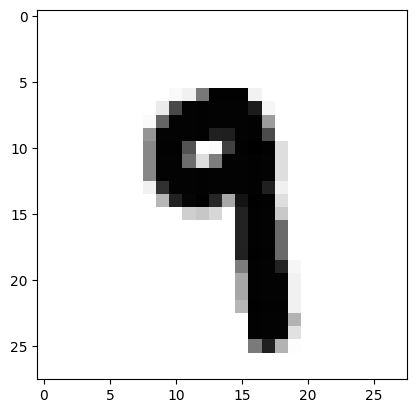

In [46]:
n = 2685
print('神經網路預測是:', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')